In [209]:
import numpy as np
from numpy import sin, log,cos
from scipy.integrate import trapezoid 
import numpy.ma as ma
import matplotlib.pyplot as plt

In [210]:
#create grid
Ndim=np.arange(-3,3+0.01,0.01)
X,Y=np.meshgrid(Ndim,Ndim,indexing='ij')
Z=X+Y*1j


In [211]:
def F(X,Y,m=0.06577949225902557,angle= np.pi/4):
    z=X+1j*Y
    a=1+m
    eta=0.5*(z+np.sqrt(z-2)*np.sqrt(z+2))
    circulation=4*np.pi*a*sin(angle) # hard code l at 4 and tc/l at 8/100    
    K=1j*circulation*log((eta+m)/a)/(2*np.pi)
    eta = ma.masked_where(np.absolute(eta+m)<=a, eta) # mask the inner circle
    eta+=m
    res= eta*np.exp(-1j*angle)+(a**2*np.exp(1j*angle))/eta+K
    return res.real,res.imag,res
def Jokowski(z):
    res=z+1/z
    return res.real,res.imag,res
def W(X,Y,m=0.06577949225902557,angle= np.pi/4,flag=True):
    z=X+1j*Y
    a=1+m
    eta=0.5*(z+np.sqrt(z-2)*np.sqrt(z+2))
    deta_dz=0.5*(1+ z/(np.sqrt(z-2)*np.sqrt(z+2)))
    circulation=4*np.pi*a*sin(angle)     
    if flag:
        eta = ma.masked_where(np.absolute(eta+m)<=a, eta) # mask the inner circle
    eta+=m
    K=1j*circulation/(2*np.pi*eta)
    res=np.exp(-1j*angle)-(a**2*np.exp(1j*angle)/np.power(eta,2))+K
    res*= deta_dz
    return res.real,-res.imag,res


In [212]:
# plt.figure(figsize=(8,8))
angle=0*np.pi/180
theta = np.linspace(0+1e-4, 1*np.pi-1.275e-1, 601)
m=0.06577916443347931
z = (1+m)*np.exp(1j*theta)-m
_,_,z=Jokowski(z)


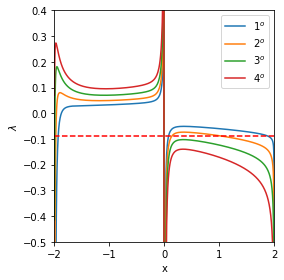

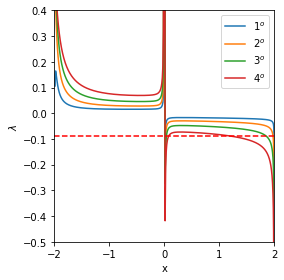

In [252]:

# plt.figure(figsize=(4,4))
# # plt.ylabel("$\\theta$")
# plt.ylabel("$\\lambda$")
# plt.xlabel("x")
# plt.tight_layout()
# plt.gca().set_aspect('equal')
angles=np.array([1,2,3,4])*np.pi/180
angle_label=["$1^o$","$2^o$","$3^o$","$4^o$"]
theta = np.linspace(0+1e-4, 1*np.pi-1.275e-1, 601)
labels=["8","4"]
mu =1e-3;
ms=[0.06577916443347931,0.0317976176738739]
for m, name in zip(ms,labels):
    plt.figure(figsize=(4,4))
    plt.ylabel("$\\lambda$")
    plt.xlabel("x")
    plt.tight_layout()
    for angle,label in zip(angles,angle_label):
        z = (1+m)*np.exp(1j*theta)-m
        _,_,z=Jokowski(z)
        u,v,w=W(z.real,z.imag,m=m,angle=angle,flag=False)
        w_square=w**2
        # lets integrate to get an answer.
        res=1j*0.5*trapezoid(w_square,z)
        A,N = res.real,-res.imag
        L=N*cos(angle)-A*sin(angle)
        # print(L,4*np.pi*(1+m)*sin(angle))
        u_inf= abs(w)
        s=abs(z)
        # mom_thick = np.sqrt(0.45*mu/u_inf**6*trapezoid(u_inf**5,abs(z)))
        mom_thick = 0.45*mu/u_inf**6*trapezoid(u_inf**5,s)
        du_ds=np.gradient(u_inf,s)
        lam = mom_thick/mu*du_ds
        # plt.plot(z.real,mom_thick,label=label)
        plt.plot(z.real,lam,label=label)
    plt.legend()
    plt.ylim((-0.5,0.4))
    plt.xlim((-2,2))
    plt.hlines(-0.09,-2,2,color="r",linestyles="--")
    plt.savefig(f"../images/{name}P_P7.png",dpi=200,bbox_inches='tight')
    plt.show()
    plt.close()


In [214]:
du_ds

array([-1.51296801e-02, -1.51296831e-02, -1.51297006e-02, -1.51297297e-02,
       -1.51297702e-02, -1.51298223e-02, -1.51298860e-02, -1.51299611e-02,
       -1.51300478e-02, -1.51301460e-02, -1.51302557e-02, -1.51303769e-02,
       -1.51305097e-02, -1.51306539e-02, -1.51308096e-02, -1.51309769e-02,
       -1.51311556e-02, -1.51313458e-02, -1.51315475e-02, -1.51317606e-02,
       -1.51319852e-02, -1.51322213e-02, -1.51324688e-02, -1.51327277e-02,
       -1.51329981e-02, -1.51332799e-02, -1.51335732e-02, -1.51338778e-02,
       -1.51341938e-02, -1.51345212e-02, -1.51348600e-02, -1.51352102e-02,
       -1.51355717e-02, -1.51359445e-02, -1.51363287e-02, -1.51367242e-02,
       -1.51371310e-02, -1.51375491e-02, -1.51379784e-02, -1.51384191e-02,
       -1.51388709e-02, -1.51393341e-02, -1.51398084e-02, -1.51402939e-02,
       -1.51407907e-02, -1.51412986e-02, -1.51418176e-02, -1.51423478e-02,
       -1.51428892e-02, -1.51434416e-02, -1.51440051e-02, -1.51445797e-02,
       -1.51451653e-02, -

In [215]:
from numpy import diff
du_ds2 = np.gradient(u_inf,s)


In [216]:
du_ds

array([-1.51296801e-02, -1.51296831e-02, -1.51297006e-02, -1.51297297e-02,
       -1.51297702e-02, -1.51298223e-02, -1.51298860e-02, -1.51299611e-02,
       -1.51300478e-02, -1.51301460e-02, -1.51302557e-02, -1.51303769e-02,
       -1.51305097e-02, -1.51306539e-02, -1.51308096e-02, -1.51309769e-02,
       -1.51311556e-02, -1.51313458e-02, -1.51315475e-02, -1.51317606e-02,
       -1.51319852e-02, -1.51322213e-02, -1.51324688e-02, -1.51327277e-02,
       -1.51329981e-02, -1.51332799e-02, -1.51335732e-02, -1.51338778e-02,
       -1.51341938e-02, -1.51345212e-02, -1.51348600e-02, -1.51352102e-02,
       -1.51355717e-02, -1.51359445e-02, -1.51363287e-02, -1.51367242e-02,
       -1.51371310e-02, -1.51375491e-02, -1.51379784e-02, -1.51384191e-02,
       -1.51388709e-02, -1.51393341e-02, -1.51398084e-02, -1.51402939e-02,
       -1.51407907e-02, -1.51412986e-02, -1.51418176e-02, -1.51423478e-02,
       -1.51428892e-02, -1.51434416e-02, -1.51440051e-02, -1.51445797e-02,
       -1.51451653e-02, -

In [217]:
du_ds2/du_ds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [218]:
z.real

array([ 1.99999999,  1.99997292,  1.9998938 ,  1.99976262,  1.99957939,
        1.99934412,  1.9990568 ,  1.99871746,  1.99832609,  1.99788271,
        1.99738732,  1.99683996,  1.99624062,  1.99558933,  1.9948861 ,
        1.99413096,  1.99332392,  1.99246501,  1.99155425,  1.99059166,
        1.98957728,  1.98851112,  1.98739323,  1.98622362,  1.98500234,
        1.98372942,  1.98240489,  1.98102879,  1.97960115,  1.97812202,
        1.97659144,  1.97500945,  1.97337609,  1.97169141,  1.96995545,
        1.96816827,  1.96632991,  1.96444042,  1.96249986,  1.96050828,
        1.95846573,  1.95637227,  1.95422795,  1.95203285,  1.94978701,
        1.94749051,  1.94514339,  1.94274574,  1.94029761,  1.93779907,
        1.93525019,  1.93265105,  1.9300017 ,  1.92730224,  1.92455272,
        1.92175323,  1.91890384,  1.91600463,  1.91305569,  1.91005709,
        1.90700891,  1.90391125,  1.90076418,  1.89756779,  1.89432217,
        1.89102741,  1.8876836 ,  1.88429084,  1.88084921,  1.87